In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import h5py

from PIL import Image, ImageEnhance

import scipy as sp
from scipy import ndimage
from scipy.spatial import distance
from scipy import signal

import cv2

In [2]:
%matplotlib inline

In [3]:

fname1 = './ptypy_reconstructions/rec_scan_000002_ML_1500_512px.ptyr'
fname2 = './ptypy_reconstructions/rec_scan_000012_ML_1500_512px.ptyr'

# fname1 = '/Users/Diego/Ptychography_data/reconstructions/weekend_scans/rec_scan_000002_ML_1500_512px.ptyr' #circular "minus" x-ray polarisation 
# fname2 = '/Users/Diego/Ptychography_data/reconstructions/weekend_scans/rec_scan_000012_ML_1500_512px.ptyr' #circular "plus"  x-ray polarisation


In [4]:
file1 = h5py.File(fname1, mode='r')
data1 = file1['content']['obj']['Sscan00G00']['data'][0,:,:]
psize1 = file1['content']['obj']['Sscan00G00']['_psize'][0]
file1.close()
file2 = h5py.File(fname2, mode='r')
data2 = file2['content']['obj']['Sscan00G00']['data'][0,:,:]
psize2 = file2['content']['obj']['Sscan00G00']['_psize'][0]
file2.close()

In [5]:
#define coordinate system of the images (in nm)

coords_y1 = 1e6*psize1*np.arange(data1.shape[0])
coords_x1 = 1e6*psize1*np.arange(data1.shape[1])

coords_y2 = 1e6*psize2*np.arange(data2.shape[0])
coords_x2 = 1e6*psize2*np.arange(data2.shape[1])

In [6]:
## Spearate complex electric field into 2 parts : amplitude and phase

phase_img1 = np.angle(data1)
phase_img2 = np.angle(data2)

amp_img1 = np.abs(data1)
amp_img2 = np.abs(data2)


### take a look at the data

Text(3.25, 5.5, 'Phase \n Circular Positive Polarisation ')

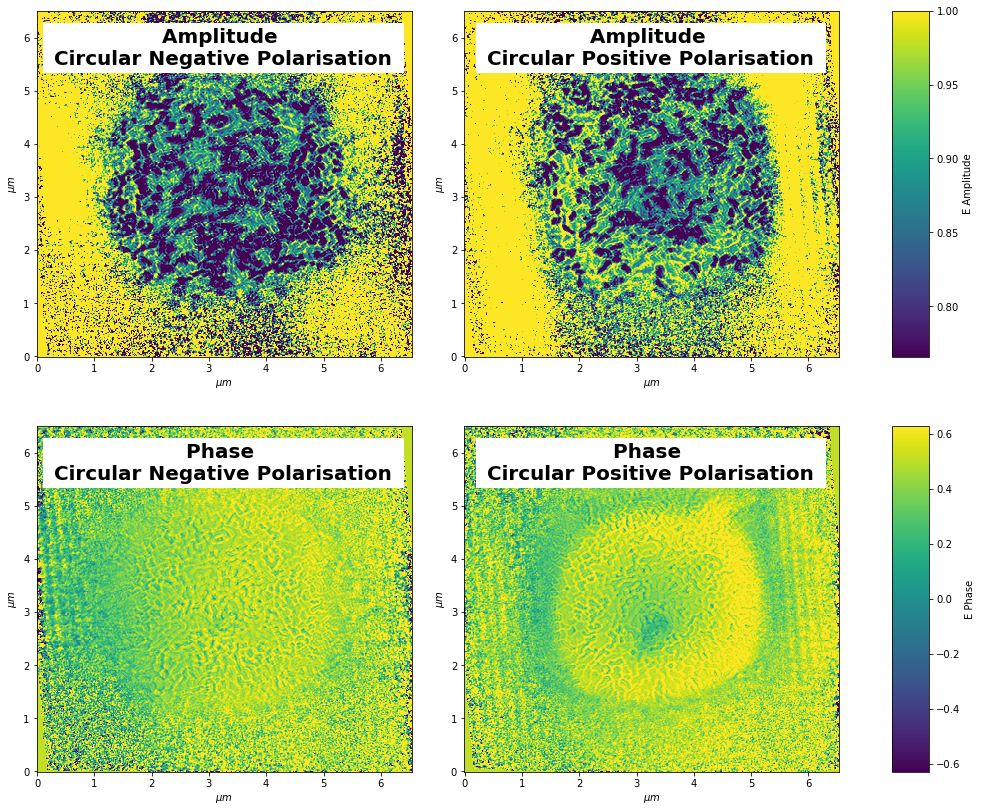

In [7]:
# take a look at the reconstructions: 

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(ncols = 3, nrows = 2,
                                                       gridspec_kw= {"width_ratios": [1,1, 0.1]}, 
                                                       figsize = (16,14) )


vmin = np.percentile(0.5*amp_img1 + 0.5*amp_img2, 7)
vmax = np.percentile(0.5*amp_img1 + 0.5*amp_img2, 60)

im1 = ax1.pcolormesh( coords_x1,  coords_y1, amp_img1, vmin = vmin, vmax = vmax )
im2 = ax2.pcolormesh( coords_x2,  coords_y2, amp_img2, vmin = vmin, vmax = vmax )
ax1.set_ylabel(r'$\mu m$')
ax1.set_xlabel(r'$\mu m$')

ax2.set_ylabel(r'$\mu m$')
ax2.set_xlabel(r'$\mu m$')

amp_clb = plt.colorbar(im1, cax = ax3)
amp_clb.set_label('E Amplitude')


vmin = -np.pi/5
vmax =  np.pi/5
im4 = ax4.pcolormesh( coords_x1,  coords_y1, phase_img1, vmin = vmin, vmax = vmax )
im5 = ax5.pcolormesh( coords_x2,  coords_y2, phase_img2, vmin = vmin, vmax = vmax )

ax4.set_ylabel(r'$\mu m$')
ax4.set_xlabel(r'$\mu m$')

ax5.set_ylabel(r'$\mu m$')
ax5.set_xlabel(r'$\mu m$')

phase_clb = plt.colorbar(im5, cax = ax6)
phase_clb.set_label('E Phase')




ax1.text(3.25, 5.5, 'Amplitude \n Circular Negative Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax2.text(3.25, 5.5, 'Amplitude \n Circular Positive Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax4.text(3.25, 5.5, 'Phase \n Circular Negative Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold', 
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax5.text(3.25, 5.5, 'Phase \n Circular Positive Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )      



### Zoom into ROI where the phase problem has an unique solution

Text(3.25, 4.5, 'Phase \n Circular Positive Polarisation ')

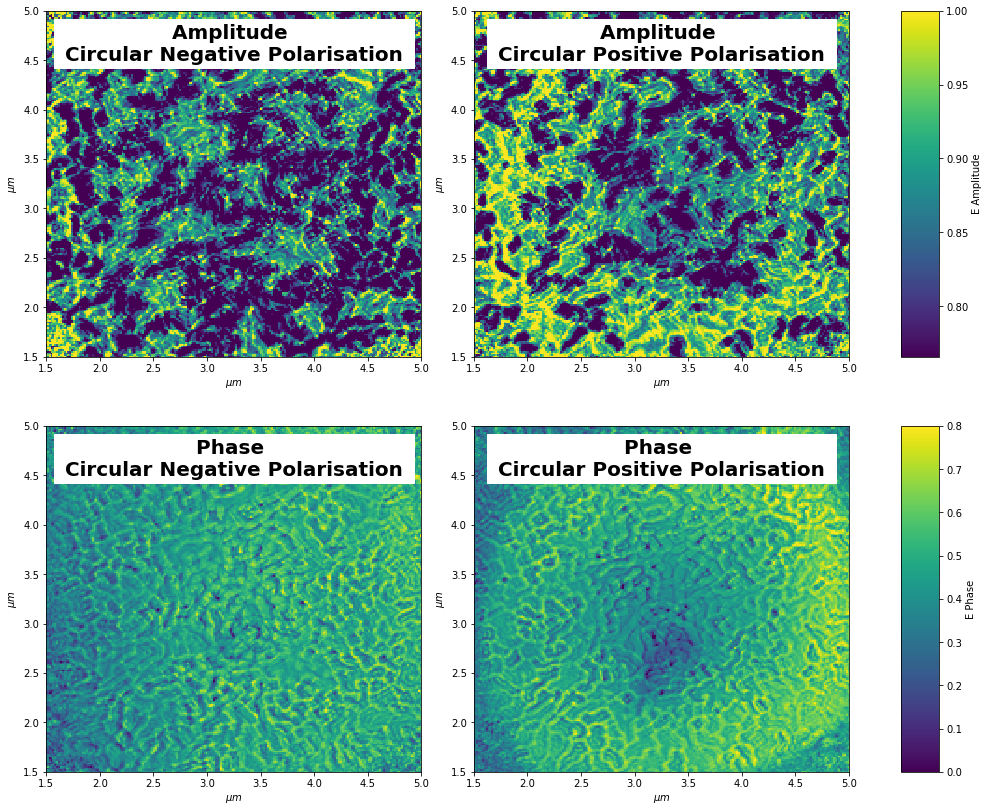

In [8]:

xlims = [1.5, 5]
ylims = [1.5, 5]



fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(ncols = 3, nrows = 2,
                                                       gridspec_kw= {"width_ratios": [1,1, 0.1]}, 
                                                       figsize = (16,14) )


vmin = np.percentile(0.5*amp_img1 + 0.5*amp_img2, 7)
vmax = np.percentile(0.5*amp_img1 + 0.5*amp_img2, 60)

im1 = ax1.pcolormesh( coords_x1,  coords_y1, amp_img1, vmin = vmin, vmax = vmax )
im2 = ax2.pcolormesh( coords_x2,  coords_y2, amp_img2, vmin = vmin, vmax = vmax )
ax1.set_ylabel(r'$\mu m$')
ax1.set_xlabel(r'$\mu m$')

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)

ax2.set_ylabel(r'$\mu m$')
ax2.set_xlabel(r'$\mu m$')

ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

amp_clb = plt.colorbar(im1, cax = ax3)
amp_clb.set_label('E Amplitude')



vmin = 0
vmax =  0.8
im4 = ax4.pcolormesh( coords_x1,  coords_y1, phase_img1, vmin = vmin, vmax = vmax )
im5 = ax5.pcolormesh( coords_x2,  coords_y2, phase_img2, vmin = vmin, vmax = vmax )

ax4.set_ylabel(r'$\mu m$')
ax4.set_xlabel(r'$\mu m$')

ax4.set_xlim(xlims)
ax4.set_ylim(ylims)


ax5.set_ylabel(r'$\mu m$')
ax5.set_xlabel(r'$\mu m$')

ax5.set_xlim(xlims)
ax5.set_ylim(ylims)

phase_clb = plt.colorbar(im5, cax = ax6)
phase_clb.set_label('E Phase')


ax1.text(3.25, 4.5, 'Amplitude \n Circular Negative Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax2.text(3.25, 4.5, 'Amplitude \n Circular Positive Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax4.text(3.25, 4.5, 'Phase \n Circular Negative Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold', 
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax5.text(3.25, 4.5, 'Phase \n Circular Positive Polarisation ', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )      




Looking at the amplitude of the transmitted E field, 3 regions can be identified: 

    1- very transmitting thin stripes: these correspond to the amorphous carbon matrix in between FePt nanoparticles
    2- "dark" square like spots: these are FePt nanograins with a magnetisation parallel to the cicular polarisation of the incoming x-rays
    3- "moderately dark" square regions: there are the FePt nanograins with a magnetisation anti-parallel to the cicular polarisation of the incoming x-rays.
    

For the negative polarisation, there is a drift of the phase value, with lower phase in the left than in the right. 
there is a ring structure for the positive polarisation phase too. 

There is no physical reason for this. This is most likely a measurement artifact/ reconstruction problem. 


Idepedently of reconstruction/measurement arifacts, in order to perform XMCD on the images, the transimtted intensity for Positive circular polarisation needs to be substaracted from the transmitted intensity for Negative circular polarisation. for that, both images need to be aligned and normalised. 

For normalisation: the Carbon region can be used as there cannot be dichroism. the idea is to normalise to the tranmitted amplitude through carbon as it needs to be the same for both helicities. 



In [9]:
## Justification for this: 

In [10]:
# select the ROI of the region we want to take into consideration in the data: 

sel_x1 = np.where(( coords_x1 < xlims[1])&( coords_x1 > xlims[0]))[0]
sel_y1 = np.where(( coords_y1 < ylims[1])&( coords_y1 > ylims[0]))[0]

sel_x2 = np.where(( coords_x2 < xlims[1])&( coords_x2 > xlims[0])) [0]
sel_y2 = np.where(( coords_y2 < ylims[1])&( coords_y2 > ylims[0])) [0]

#create new data arrays with the cropped info

reduced_data1 = data1[sel_x1][:,sel_y1]
reduced_data2 = data2[sel_x2][:,sel_y2]

# check amplitude distribution in the ROIS 
hist_data1, data1_bins = np.histogram((np.abs(reduced_data1)).flatten(), 10000)
hist_data2, data2_bins = np.histogram((np.abs(reduced_data2)).flatten(), 10000)


hist_data_phase1, data_phase1_bins = np.histogram((np.angle(reduced_data1)).flatten(), 10000)
hist_data_phase2, data_phase2_bins = np.histogram((np.angle(reduced_data2)).flatten(), 10000)



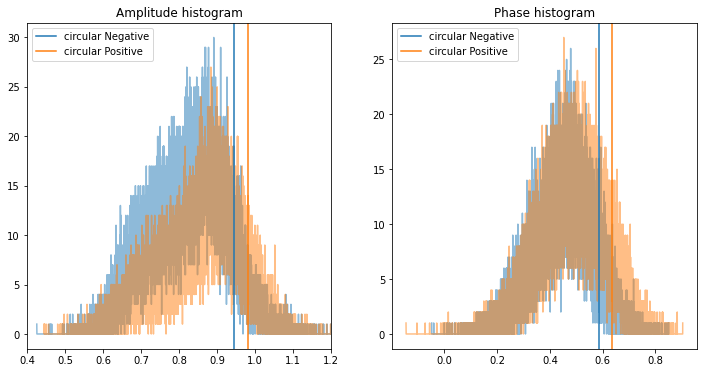

In [11]:


fig, [ax1, ax2] = plt.subplots(ncols = 2, figsize = (12,6) )

ax1.plot(data1_bins[:-1], hist_data1, alpha = 0.5)
ax1.plot(data2_bins[:-1], hist_data2, alpha = 0.5)

ax1.set_xlim(0.4, 1.2)
ax1.set_title('Amplitude histogram')


ax1.axvline(np.percentile(np.abs(reduced_data1), 90), c='C0', label = 'circular Negative')
ax1.axvline(np.percentile(np.abs(reduced_data2), 90),c='C1', label = 'circular Positive')
ax1.legend()



ax2.plot(data_phase1_bins[:-1], hist_data_phase1, alpha = 0.5)
ax2.plot(data_phase2_bins[:-1], hist_data_phase2, alpha = 0.5)

# ax2.set_xlim(0.4, 1.2)
ax2.set_title('Phase histogram')


ax2.axvline(np.percentile(np.angle(reduced_data1), 90), c='C0', label = 'circular Negative')
ax2.axvline(np.percentile(np.angle(reduced_data2), 90),c='C1', label = 'circular Positive')
ax2.legend()



In [12]:
C_mask_amp_1 =  np.zeros_like(np.abs(reduced_data1) )
C_mask_amp_1[np.where((np.abs(reduced_data1) > np.percentile(np.abs(reduced_data1), 90)))] = 1

C_mask_amp_2 =  np.zeros_like(np.abs(reduced_data2) )
C_mask_amp_2[np.where((np.abs(reduced_data2) > np.percentile(np.abs(reduced_data2), 90)))] = 1



C_mask_phase_1 =  np.zeros_like(np.abs(reduced_data1) )
C_mask_phase_1[np.where((np.angle(reduced_data1) > np.percentile(np.angle(reduced_data1), 90)))] = 1

C_mask_phase_2 =  np.zeros_like(np.abs(reduced_data2) )
C_mask_phase_2[np.where((np.angle(reduced_data2) > np.percentile(np.angle(reduced_data2), 90)))] = 1


Text(0.5, 1.0, 'PHASE Carbon mask circular Positive')

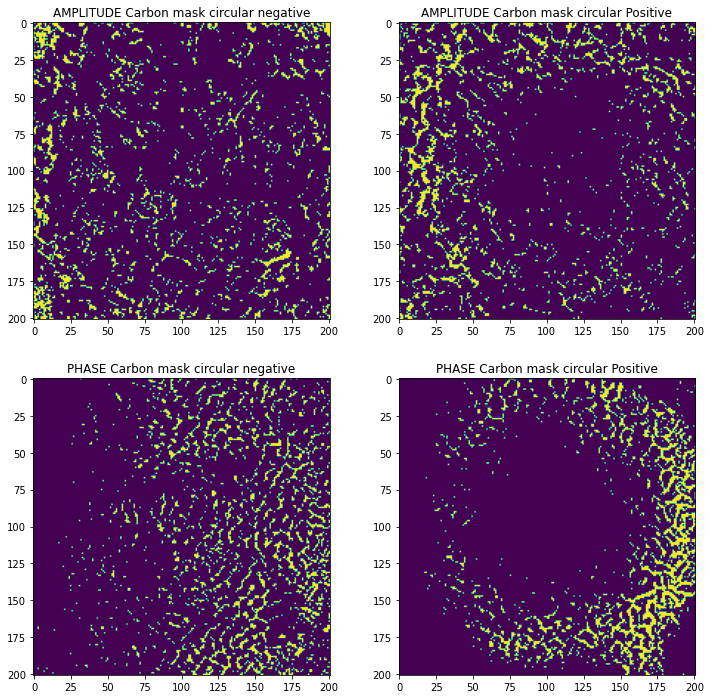

In [13]:

fig, [[ax1, ax2], [ax3,ax4] ] = plt.subplots(ncols = 2,nrows = 2, figsize = (12,12))
ax1.imshow(C_mask_amp_1)
ax2.imshow(C_mask_amp_2)
ax1.set_title('AMPLITUDE Carbon mask circular negative')
ax2.set_title('AMPLITUDE Carbon mask circular Positive')

ax3.imshow(C_mask_phase_1)
ax4.imshow(C_mask_phase_2)

ax3.set_title('PHASE Carbon mask circular negative')
ax4.set_title('PHASE Carbon mask circular Positive')

The aberrations seen in the phase, are also present in the amplitude ( but with an oposite evolution: the places where the phase is the biggest, the amplitude is the smallest. 
This needs to be corrected before being able to continue...

### Correction of measurement artifacts: "local normalisation" 

The idea is to use a gaussian blurr filter with fwhm sufficiently big to average out all the relevant information and only get the overall evolution of intensity, we should be able to skip this step with a better  reconstruction treatement or with better experimental conditions 

In [14]:
def makeGaussian(size, sigma = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    it's a distribution so the integral of this thing is one... 
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return (1/(2*np.pi*sigma**2) )*np.exp( -((x-x0)**2 + (y-y0)**2) / (2*sigma**2) )

In [15]:
kernel_phase = makeGaussian(size = phase_img1.shape[0], sigma = 5 ) # defined by the average nanoparticle-Carbon lengthcalse
kernel_amp = makeGaussian(size = phase_img1.shape[0], sigma = 25 ) # defined by the average Magnetic domains lengthcalse


0.9999999999999999
0.9999999999998501


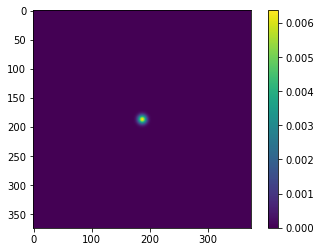

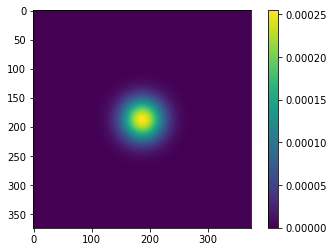

In [16]:
plt.figure()
plt.imshow(kernel_phase)
plt.colorbar()
print(np.sum(kernel_phase) )

plt.figure()
plt.imshow(kernel_amp)
plt.colorbar()
print(np.sum(kernel_amp) )

In [17]:
# the Gaussian filter is applied here 

blurr_amp_img1 = signal.fftconvolve(amp_img1, kernel_amp, mode='same')
blurr_amp_img2 = signal.fftconvolve(amp_img2, kernel_amp, mode='same')

blurr_phase_img1 = signal.fftconvolve(phase_img1, kernel_phase, mode='same')
blurr_phase_img2 = signal.fftconvolve(phase_img2, kernel_phase, mode='same')


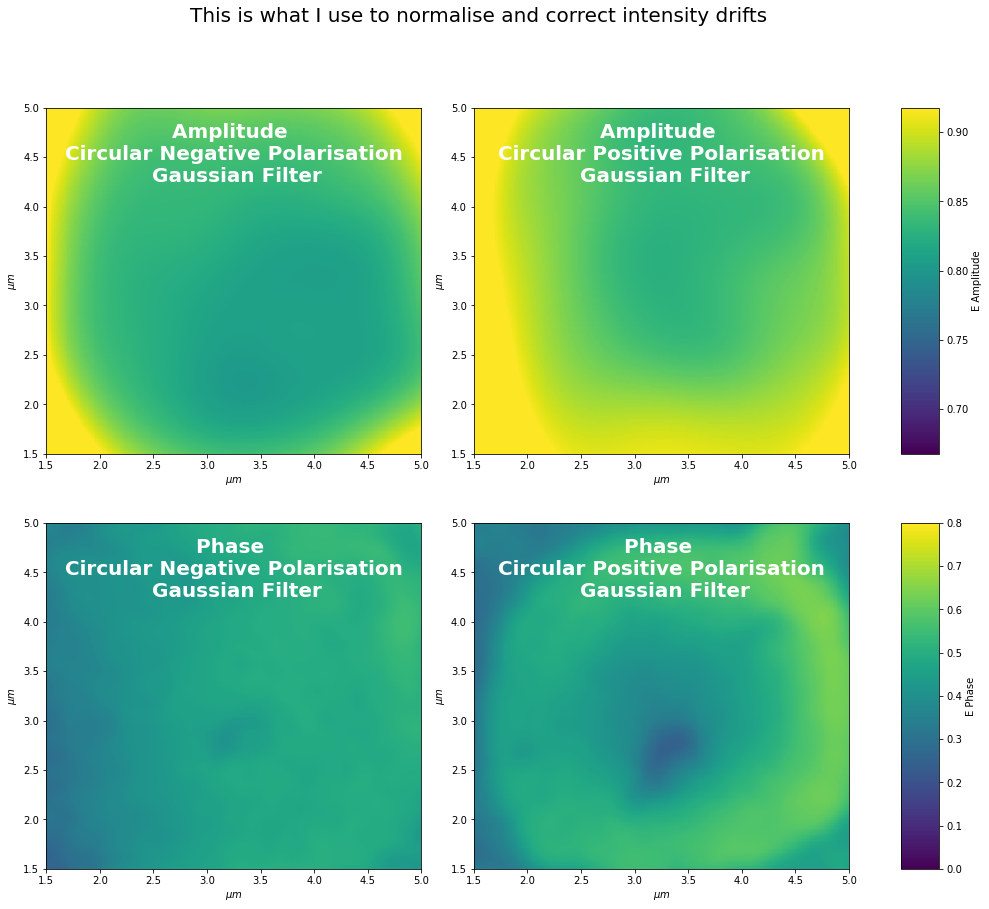

In [18]:
# Show them blurrs 

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(ncols = 3, nrows = 2,
                                                       gridspec_kw= {"width_ratios": [1,1, 0.1]}, 
                                                       figsize = (16,14) )


vmin = np.percentile(0.5*blurr_amp_img1 + 0.5*blurr_amp_img2, 7)
vmax = np.percentile(0.5*blurr_amp_img1 + 0.5*blurr_amp_img2, 60)

im1 = ax1.pcolormesh( coords_x1,  coords_y1, blurr_amp_img1, vmin = vmin, vmax = vmax )
im2 = ax2.pcolormesh( coords_x2,  coords_y2, blurr_amp_img2, vmin = vmin, vmax = vmax )
ax1.set_ylabel(r'$\mu m$')
ax1.set_xlabel(r'$\mu m$')

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)

ax2.set_ylabel(r'$\mu m$')
ax2.set_xlabel(r'$\mu m$')

ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

amp_clb = plt.colorbar(im1, cax = ax3)
amp_clb.set_label('E Amplitude')



vmin = 0
vmax =  0.8
im4 = ax4.pcolormesh( coords_x1,  coords_y1, blurr_phase_img1, vmin = vmin, vmax = vmax )
im5 = ax5.pcolormesh( coords_x2,  coords_y2, blurr_phase_img2, vmin = vmin, vmax = vmax )

ax4.set_ylabel(r'$\mu m$')
ax4.set_xlabel(r'$\mu m$')

ax4.set_xlim(xlims)
ax4.set_ylim(ylims)


ax5.set_ylabel(r'$\mu m$')
ax5.set_xlabel(r'$\mu m$')

ax5.set_xlim(xlims)
ax5.set_ylim(ylims)

phase_clb = plt.colorbar(im5, cax = ax6)
phase_clb.set_label('E Phase')


ax1.text(3.25, 4.25, 'Amplitude \n Circular Negative Polarisation \n Gaussian Filter', color = 'white',
         fontsize = 20, weight = 'bold',
        horizontalalignment = 'center' )

ax2.text(3.25, 4.25, 'Amplitude \n Circular Positive Polarisation \n Gaussian Filter', color = 'white',
         fontsize = 20, weight = 'bold',
        horizontalalignment = 'center' )  
ax4.text(3.25, 4.25, 'Phase \n Circular Negative Polarisation \n Gaussian Filter', color = 'white',
         fontsize = 20, weight = 'bold',
        horizontalalignment = 'center' )

ax5.text(3.25, 4.25, 'Phase \n Circular Positive Polarisation \n Gaussian Filter', color = 'white',
         fontsize = 20, weight = 'bold',
        horizontalalignment = 'center' )      



fig.suptitle('This is what I use to normalise and correct intensity drifts', fontsize = 20);

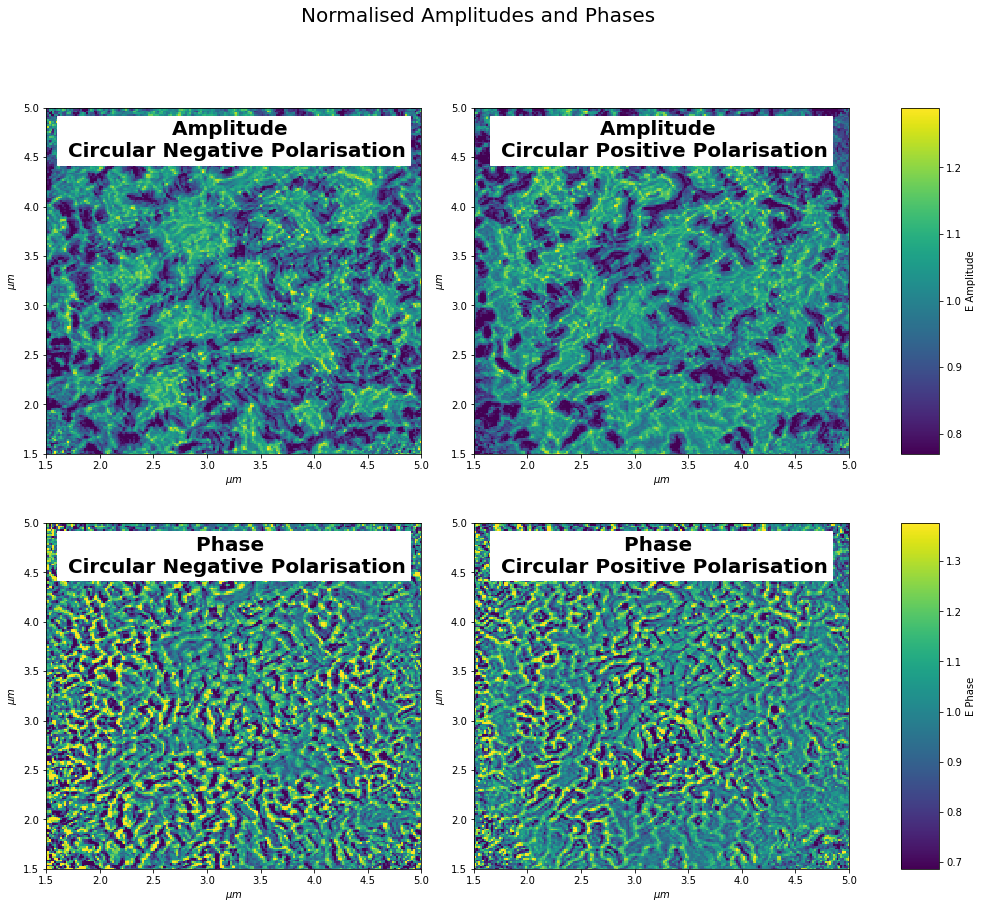

In [19]:
# Show them blurrs 

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(ncols = 3, nrows = 2,
                                                       gridspec_kw= {"width_ratios": [1,1, 0.1]}, 
                                                       figsize = (16,14) )


vmin = np.percentile(0.5*(amp_img1/blurr_amp_img1) + 0.5*(amp_img2/blurr_amp_img2), 1)
vmax = np.percentile(0.5*(amp_img1/blurr_amp_img1) + 0.5*(amp_img2/blurr_amp_img2), 80)

im1 = ax1.pcolormesh( coords_x1,  coords_y1, amp_img1/blurr_amp_img1, vmin = vmin, vmax = vmax )
im2 = ax2.pcolormesh( coords_x2,  coords_y2, amp_img2/blurr_amp_img2, vmin = vmin, vmax = vmax )
ax1.set_ylabel(r'$\mu m$')
ax1.set_xlabel(r'$\mu m$')

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)

ax2.set_ylabel(r'$\mu m$')
ax2.set_xlabel(r'$\mu m$')

ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

amp_clb = plt.colorbar(im1, cax = ax3)
amp_clb.set_label('E Amplitude')

ax1.text(3.25, 4.5, 'Amplitude \n Circular Negative Polarisation', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax2.text(3.25, 4.5, 'Amplitude \n Circular Positive Polarisation', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )         

vmin = np.percentile(0.5*(phase_img1/blurr_phase_img1) + 0.5*(phase_img2/blurr_phase_img2), 10)
vmax = np.percentile(0.5*(phase_img1/blurr_phase_img1) + 0.5*(phase_img2/blurr_phase_img2), 90)

im4 = ax4.pcolormesh( coords_x1,  coords_y1, phase_img1/blurr_phase_img1, vmin = vmin, vmax = vmax )
im5 = ax5.pcolormesh( coords_x2,  coords_y2, phase_img2/blurr_phase_img2, vmin = vmin, vmax = vmax )

ax4.set_ylabel(r'$\mu m$')
ax4.set_xlabel(r'$\mu m$')

ax4.set_xlim(xlims)
ax4.set_ylim(ylims)


ax5.set_ylabel(r'$\mu m$')
ax5.set_xlabel(r'$\mu m$')

ax5.set_xlim(xlims)
ax5.set_ylim(ylims)



ax4.text(3.25, 4.5, 'Phase \n Circular Negative Polarisation', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax5.text(3.25, 4.5, 'Phase \n Circular Positive Polarisation', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )      


phase_clb = plt.colorbar(im5, cax = ax6)
phase_clb.set_label('E Phase')

fig.suptitle('Normalised Amplitudes and Phases', fontsize = 20);


### Now that the images are normalised, we can proceed with aligning the two images 

At the Fe maximum absorption, there will be no phase dichroism, ie the phase will be changed the same for circular positive and circular negative x-rays passing through FePt 

In [20]:
## Crop the data so that only the relevant part of the image is considered for alignment:

In [21]:
reduced_data_phase1 = (phase_img1/blurr_phase_img1)[sel_x1][:,sel_y1]
reduced_data_phase2 = (phase_img2/blurr_phase_img2)[sel_x2][:,sel_y2]

reduced_data_amp1 = (amp_img1/blurr_amp_img1)[sel_x1][:,sel_y1]
reduced_data_amp2 = (amp_img2/blurr_amp_img2)[sel_x2][:,sel_y2]

In [22]:
# https://learnopencv.com/image-alignment-ecc-in-opencv-c-python/ 
# aligment with open cv using EEC

In [23]:
sz = reduced_data_phase1.shape

In [24]:
warp_mode = cv2.MOTION_TRANSLATION
# warp_mode = cv2.MOTION_HOMOGRAPHY
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)

In [25]:
# this part is the most fiddly ! (damn drifting mottors ... )

In [26]:
warp_matrix[1,2] = -14 # this was me, the algorithm only converges if I provide it with a more or less suitable starting condition 


In [27]:
# Specify the number of iterations.
number_of_iterations = 200000;

In [28]:
# Specify the threshold of the increment
# in the coarrelation coefficient between two iterations
termination_eps = 1e-10;

In [29]:
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

In [30]:
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (
    reduced_data_phase1.astype(np.float32), 
    reduced_data_phase2.astype(np.float32),
    warp_matrix, warp_mode, criteria, 
    inputMask = None, gaussFiltSize = 5)




In [31]:
warp_matrix

array([[  1.       ,   0.       ,  -0.5756106],
       [  0.       ,   1.       , -14.229588 ]], dtype=float32)

In [32]:
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography
    reduced_data_phase2_aligned = cv2.warpPerspective (reduced_data_phase2.astype(np.float32), warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    reduced_data_phase2_aligned = cv2.warpAffine(reduced_data_phase2.astype(np.float32), warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

Text(0.5, 1.0, 'Image 2 aligned')

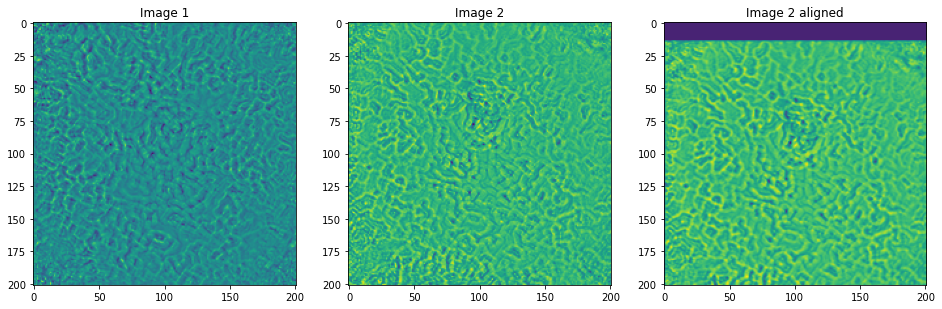

In [33]:
# Show final results
fig, [ax1, ax2, ax3] = plt.subplots(ncols= 3, figsize = (16,9))
ax1.imshow(reduced_data_phase1) #"Image 1",
ax1.set_title('Image 1')
ax2.imshow(reduced_data_phase2)
ax2.set_title('Image 2')

ax3.imshow(reduced_data_phase2_aligned)
ax3.set_title('Image 2 aligned')


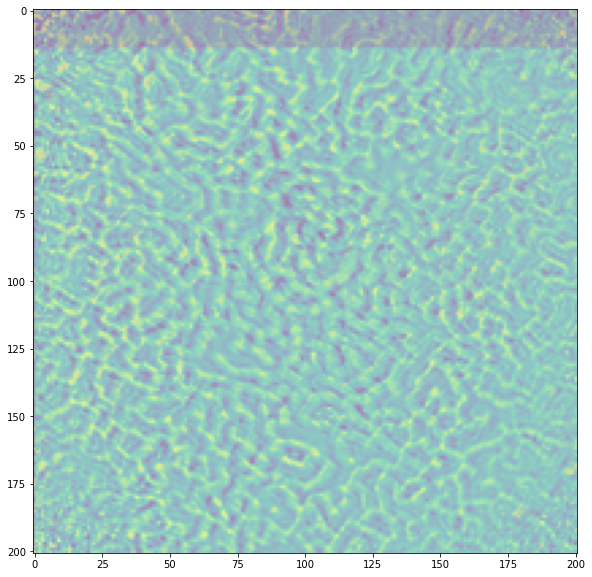

In [45]:
vmin = np.percentile(reduced_data_phase1/np.mean(reduced_data_phase1), 1)
vmax = np.percentile(reduced_data_phase1/np.mean(reduced_data_phase1), 99)

plt.figure(figsize = (10,10))
plt.imshow(reduced_data_phase2_aligned/np.mean(reduced_data_phase2), alpha=0.3, vmin = vmin, vmax = vmax)

plt.imshow(reduced_data_phase1/np.mean(reduced_data_phase1), alpha=0.3, vmin = vmin, vmax = vmax)


### Now I can apply this method to the images I wanted to originally align

In [35]:

phase_img1_norm = (phase_img1/blurr_phase_img1).astype(np.float32)
phase_img2_norm = (phase_img2/blurr_phase_img2).astype(np.float32)

amp_img1_norm = (amp_img1/blurr_amp_img1).astype(np.float32)
amp_img2_norm = (amp_img2/blurr_amp_img2).astype(np.float32)


sz = phase_img1_norm.shape



if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography
    phase_img2_norm_aligned = cv2.warpPerspective (phase_img2_norm, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    amp_img2_norm_aligned = cv2.warpPerspective (amp_img2_norm, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)


else :
    # Use warpAffine for Translation, Euclidean and Affine
    phase_img2_norm_aligned = cv2.warpAffine(phase_img2_norm, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    amp_img2_norm_aligned = cv2.warpAffine(amp_img2_norm, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    
    
    

In [36]:
# Now I can separate the carbon from the FePt

In [37]:
phase_img_avg = (0.5*phase_img2_norm_aligned + 0.5*phase_img1_norm)[sel_x1][:,sel_y1]

treshold = np.percentile(phase_img_avg, 90)
C_mask = np.zeros_like(phase_img_avg)
C_sel = np.where(phase_img_avg > treshold)
C_mask[C_sel] = 1


Text(100, 25, 'Carbon Mask ')

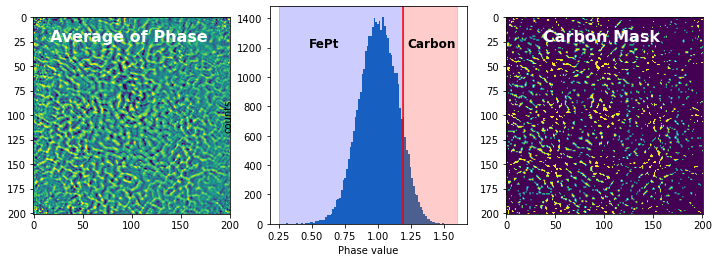

In [38]:
vmin = np.percentile(phase_img_avg, 1)
vmax = np.percentile(phase_img_avg, 99)

fig, [ax1, ax2, ax3] = plt.subplots(ncols = 3, figsize = (12,4))
ax1.imshow(phase_img_avg, vmin=vmin, vmax=vmax)
_=  ax2.hist(phase_img_avg.flatten(), bins =100)
ax2.axvline(treshold, c='r')
ax2.axvspan(0.25,treshold, alpha = 0.2, color='blue')
ax2.axvspan(treshold,1.6, alpha = 0.2, color='red')
ax2.text(0.50-0.025, 1200, 'FePt', fontsize = 12, weight = 'bold')
ax2.text(1.25-0.025, 1200, 'Carbon', fontsize = 12, weight = 'bold')
ax2.set_ylabel('counts')
ax2.set_xlabel('Phase value')

ax1.text(100, 25, 'Average of Phase ', color = 'white',
         fontsize = 16, weight = 'bold',
        horizontalalignment = 'center' )      

ax3.imshow(C_mask, vmin=0, vmax=1)

ax3.text(100, 25, 'Carbon Mask ', color = 'white',
         fontsize = 16, weight = 'bold',
        horizontalalignment = 'center' )      

In [39]:
amp1 = amp_img1_norm[sel_x1][:,sel_y1]
amp2 = amp_img2_norm_aligned[sel_x1][:,sel_y1]

phase1 = phase_img1_norm[sel_x1][:,sel_y1]
phase2 = phase_img2_norm_aligned[sel_x1][:,sel_y1]

coord_x = coords_x1[sel_x1]
coord_y = coords_y1[sel_y1]

# norm_amp1 = np.mean(amp1[C_sel])
norm_amp1 = np.percentile(amp1[C_sel], 98)
# norm_amp2 = np.mean(amp2[C_sel])
norm_amp2 = np.percentile(amp2[C_sel], 98)


# norm_phase1 = np.mean(phase1[C_sel])
# norm_phase2 = np.mean(phase2[C_sel])
norm_phase1 = np.percentile(phase1[C_sel],98)
norm_phase2 = np.percentile(phase2[C_sel],98)

results in "raw" format, we start seeing the results we expected ! 

Text(3.25, 4.5, 'Average tansmission \n Phase')

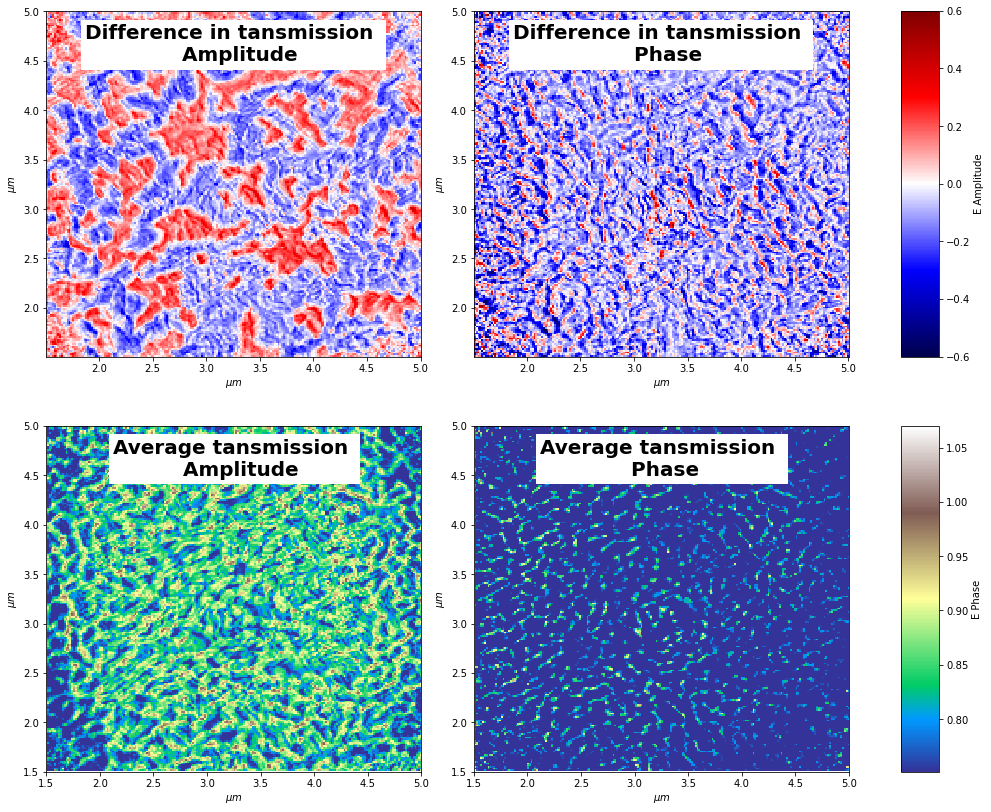

In [40]:
# 
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(ncols = 3, nrows = 2,
                                                       gridspec_kw= {"width_ratios": [1,1, 0.1]}, 
                                                       figsize = (16,14) )


# vmin = np.percentile(amp1, 1)
# vmax = np.percentile(amp1, 80)

vmin = -0.6
vmax = +0.6

im1 = ax1.pcolormesh( coord_x,  coord_y, amp1/norm_amp1 - amp2/norm_amp2, cmap='seismic', vmin = vmin, vmax = vmax )
im2 = ax2.pcolormesh( coord_x,  coord_y, phase1/norm_phase1 - phase2/norm_phase2, cmap='seismic', vmin = vmin, vmax = vmax )

ax1.set_ylabel(r'$\mu m$')
ax1.set_xlabel(r'$\mu m$')

ax2.set_ylabel(r'$\mu m$')
ax2.set_xlabel(r'$\mu m$')

amp_clb = plt.colorbar(im1, cax = ax3)
amp_clb.set_label('E Amplitude')



    

vmin = np.percentile( 0.5*amp1/norm_amp1 + 0.5*amp2/norm_amp2, 10)
vmax = np.percentile( 0.5*amp1/norm_amp1 + 0.5*amp2/norm_amp2, 100)

# vmin = 0
# vmax = 1.2

im4 = ax4.pcolormesh( coord_x,  coord_y, 0.5*amp1/norm_amp1 + 0.5*amp2/norm_amp2,
                     cmap = 'terrain',
                     vmin = vmin, vmax = vmax )
im5 = ax5.pcolormesh( coord_x,  coord_y, 0.5*phase1/norm_phase1 + 0.5*phase2/norm_phase2,
                     cmap = 'terrain',
                     vmin = vmin, vmax = vmax )




ax4.set_ylabel(r'$\mu m$')
ax4.set_xlabel(r'$\mu m$')

ax4.set_xlim(xlims)
ax4.set_ylim(ylims)


ax5.set_ylabel(r'$\mu m$')
ax5.set_xlabel(r'$\mu m$')

ax5.set_xlim(xlims)
ax5.set_ylim(ylims)


phase_clb = plt.colorbar(im5, cax = ax6)
phase_clb.set_label('E Phase')

fig.suptitle('', fontsize = 20);



ax1.text(3.25, 4.5, 'Difference in tansmission \n  Amplitude', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax2.text(3.25, 4.5, 'Difference in tansmission \n  Phase', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )     
ax4.text(3.25, 4.5, 'Average tansmission \n  Amplitude', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax5.text(3.25, 4.5, 'Average tansmission \n Phase', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )      


Now I can calculate XAS vaules,
The detectino in transmission geometry in STXM is not sentitive to the electric field itself but to the intensity
which is the square of amplitude of the electric field.

In [41]:
# first calculate the measurable quantity from STXM measurements 

XAS1 = -np.log(amp1**2/norm_amp1**2)
XAS2 = -np.log(amp2**2/norm_amp2**2)


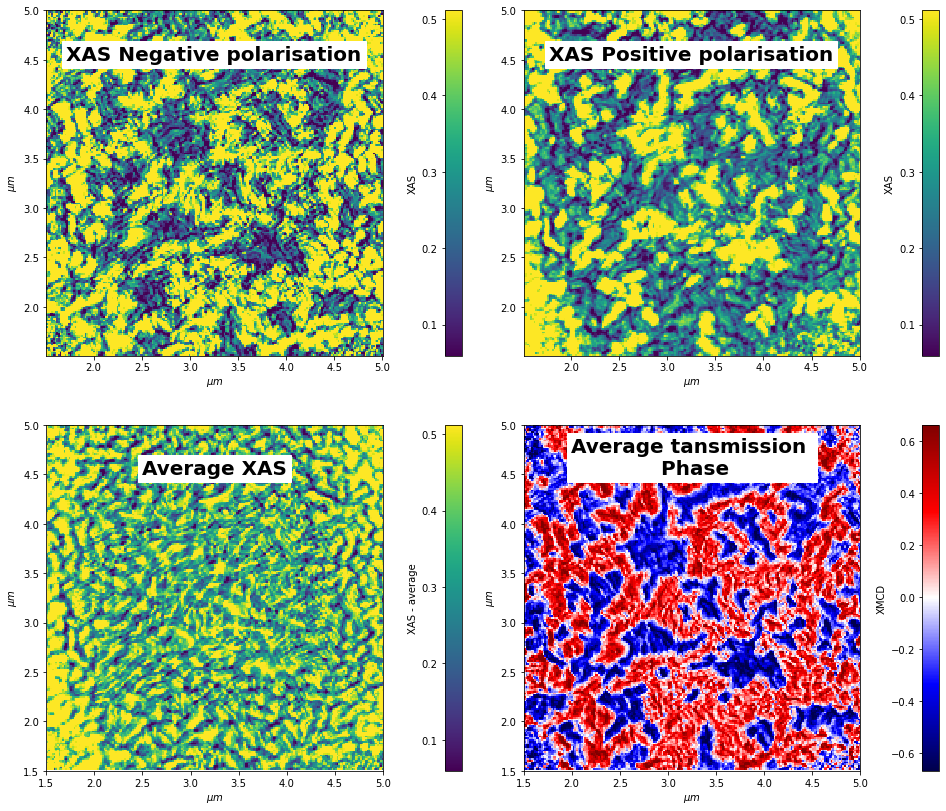

In [42]:
# 
fig, [[ax1, ax15, ax2, ax3], [ax4,ax45, ax5, ax6]] = plt.subplots(ncols = 4, nrows = 2,
                                                       gridspec_kw= {"width_ratios": [1,0.05, 1, 0.05],
                                                                    "wspace": .35}, 
                                                              
                                                       figsize = (16,14) )


vmin = np.percentile(0.5*XAS1 + 0.5*XAS2, 1)
vmax = np.percentile(0.5*XAS1 + 0.5*XAS2, 80)

im1 = ax1.pcolormesh( coord_x,  coord_y, XAS1, vmin = vmin, vmax = vmax )
im2 = ax2.pcolormesh( coord_x,  coord_y, XAS2, vmin = vmin, vmax = vmax )

ax1.set_ylabel(r'$\mu m$')
ax1.set_xlabel(r'$\mu m$')

ax2.set_ylabel(r'$\mu m$')
ax2.set_xlabel(r'$\mu m$')

amp_clb = plt.colorbar(im1, cax = ax3,)
amp_clb.set_label('XAS')
amp_clb = plt.colorbar(im1, cax = ax15, )

ax3.yaxis.set_ticks_position('left')
ax15.yaxis.set_ticks_position('left')

ax3.yaxis.set_label_position('left')
ax15.yaxis.set_label_position('left')

amp_clb.set_label('XAS')



    

    
vmin = np.percentile(0.5*XAS1 + 0.5*XAS2, 1)
vmax = np.percentile(0.5*XAS1 + 0.5*XAS2, 80)

im4 = ax4.pcolormesh( coord_x,  coord_y, 0.5*XAS1 + 0.5*XAS2,
                     cmap = 'viridis',
                     vmin = vmin, vmax = vmax )

phase_clb = plt.colorbar(im4, cax = ax45)
phase_clb.set_label('XAS - average')
ax45.yaxis.set_ticks_position('left')
ax45.yaxis.set_label_position('left')







vmin = np.percentile( XAS1-XAS2, 2)
vmax = np.percentile( XAS1-XAS2, 98)

im5 = ax5.pcolormesh( coord_x,  coord_y, XAS1 -XAS2,
                     cmap = 'seismic',
                     vmin = vmin, vmax = vmax )

ax4.set_ylabel(r'$\mu m$')
ax4.set_xlabel(r'$\mu m$')
ax4.set_xlim(xlims)
ax4.set_ylim(ylims)






ax5.set_ylabel(r'$\mu m$')
ax5.set_xlabel(r'$\mu m$')
ax5.set_xlim(xlims)
ax5.set_ylim(ylims)

phase_clb = plt.colorbar(im5, cax = ax6)
phase_clb.set_label('XMCD')
ax6.yaxis.set_ticks_position('left')
ax6.yaxis.set_label_position('left')






ax1.text(3.25, 4.5, 'XAS Negative polarisation', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax2.text(3.25, 4.5, 'XAS Positive polarisation', color = 'black',
         fontsize = 20, weight = 'bold',
         backgroundcolor = 'white',
        horizontalalignment = 'center' )     

ax4.text(3.25, 4.5, 'Average XAS', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )

ax5.text(3.25, 4.5, 'Average tansmission \n Phase', color = 'black',
         fontsize = 20, weight = 'bold',
          backgroundcolor = 'white',
        horizontalalignment = 'center' )      







fig.suptitle('', fontsize = 20);



In [43]:
hist, bins = np.histogram(XAS1-XAS2,bins = 1000)

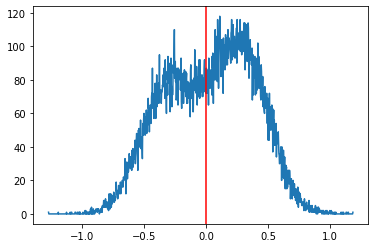

In [44]:
mask_neg =  np.where((XAS1-XAS2) < 0 )
mask_pos =  np.where((XAS1-XAS2) > 0 )

plt.plot(bins[1::], hist)
plt.axvline(0, color='red')

We confirm that there are more spins in one way than another. 
this is concistent with the demagnetisation curves we got before. 


the magnetisation dependent blurr in the phase domain is an indication that the measurement was not done at precisely the resonnance energy.

In [46]:
np.mean(0.5*XAS1 + 0.5*XAS2)

0.38351363